# Conversão de Todos os Arquivos

In [8]:
import pandas as pd
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi']= 150

veja = pd.read_csv('veja.csv')
estadao = pd.read_csv('estadao.csv')
folha = pd.read_csv('folha.csv')
uol = pd.read_csv('uol.csv')

In [13]:
def getColumnsWithThemes(table):
    return list(filter(lambda column: 'Tema' in column, table.columns))

def getAllThemes(table):
    columnsWithTheme = getColumnsWithThemes(table)
    allThemes = Counter()
    
    for column in columnsWithTheme:
        for theme in table[column]:
            allThemes[theme] += 1
            
    allThemes = dict(allThemes)
    
    return allThemes

def filterTableByYear(table, year):
    return table[table.date.str.contains(year)]

def get2018Table(table):
    return filterTableByYear(table, '2018')
def get2017Table(table):
    return filterTableByYear(table, '2017')
    

vejaThemes = getAllThemes(veja)
estadaoThemes = getAllThemes(estadao)
folhaThemes = getAllThemes(folha)
uolThemes = getAllThemes(uol)

baseThemes = [\
 'saude',\
 'entretenimento',\
 'politica',\
 'esporte',\
 'ciencia',\
 'brasil',\
 'educacao',\
 'tecnologia',\
 'blog',\
 'economia',\
 'outros']

def matchBaseTheme(s):
    for theme in baseThemes:
        if (theme in s):
            return (theme, s)
    return None

def createConversionTable(themes, cleanUpFunction):
    conversionTable = {}

    data = map(\
        lambda x: cleanUpFunction(x),\
        list(themes.keys())\
    )

    for theme, originalTheme in data:
        conversionTable[originalTheme] = theme
        
    return conversionTable

def countThemes(themes, conversionTable):
    quantityOfThemes = Counter()
    
    for theme, quantity in themes.items():
        theme = str(theme)
        quantityOfThemes[conversionTable[theme]] += quantity
        
    return OrderedDict(quantityOfThemes.most_common())

def printTable(table, cleanupFunction, filename, title):
    themesTable = getAllThemes(table)
    conversionTable = createConversionTable(themesTable, cleanupFunction)
    quantityOfThemes = countThemes(themesTable, conversionTable)

    index = np.arange(len(quantityOfThemes.keys()))
    plt.bar(index, quantityOfThemes.values())
    plt.rcParams['figure.dpi']= 300
    plt.xlabel('Tema', fontsize=10)
    plt.ylabel('Quantitidade', fontsize=10)
    plt.xticks(index, quantityOfThemes.keys(), fontsize=8, rotation=50)
    plt.title(title)
    plt.savefig(filename, bbox_inches='tight')
    plt.cla()
    plt.clf()
    plt.close()

# Veja

In [10]:
def cleanVejaThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if ('esporte' in themeString or\
        'placar' in themeString):
        return ('esporte', themeString)
    if ('blog' in themeString):
        return 'blog'
    if ('galeria-fotos' in themeString or\
        'nan' in themeString or\
        'especiais' in themeString or\
        'gastronomia' in themeString or\
        'mundo' in themeString or\
        'ideias' in themeString or\
        '?p=2643144' in themeString or\
        'revista-veja' in themeString or\
        '?p=1833069' in themeString or\
        'tveja' in themeString):
        return ('outros', themeString)
    return (themeString, themeString)

def createVejaConversionTable():
    vejaConversionTable = {}

    data = map(\
        lambda x: cleanVejaThemes(x),\
        list(vejaThemes.keys())\
    )

    for theme, originalTheme in data:
        vejaConversionTable[originalTheme] = theme
        
    return vejaConversionTable





In [12]:
printTable(get2017Table(veja), cleanVejaThemes, 'veja-2017-total.png', 'Noticias Veja 2017')
printTable(get2018Table(veja), cleanVejaThemes, 'veja-2018-total.png', 'Noticias Veja 2018')


In [14]:
get2017Table(veja)

,date,1 - Título,1 - URL,1 - Tema,2 - Título,2 - URL,2 - Tema,3 - Título,3 - URL,3 - Tema,...,7 - Tema,8 - Título,8 - URL,8 - Tema,9 - Título,9 - URL,9 - Tema,10 - Título,10 - URL,10 - Tema
1,"""2017-01-01T21:06:58.000Z""","Homem mata filho, ex-mulher e mais dez pessoas...",http://web.archive.org/web/20170101220658/http...,brasil,Seis vencedores vão dividir prêmio da Mega Sen...,http://web.archive.org/web/20170101220658/http...,brasil,Leia carta deixada por autor de chacina em Cam...,http://web.archive.org/web/20170101220658/http...,brasil,...,brasil,Viúva do embaixador recebia amante em casa enq...,http://web.archive.org/web/20170101220658/http...,brasil,Mariah Carey larga show antes do fim na Times ...,http://web.archive.org/web/20170101220658/http...,entretenimento,Matthew McConaughey: 'Sou louco pela novela Vi...,http://web.archive.org/web/20170101220658/http...,entretenimento
2,"""2017-01-03T17:24:44.000Z""",Leia carta deixada por autor de chacina em Cam...,http://web.archive.org/web/20170103182444/http...,brasil,"Terremoto de magnitude 4,6 atinge o Maranhão",http://web.archive.org/web/20170103182444/http...,brasil,Trump diz à Coreia do Norte que 'não haverá ar...,http://web.archive.org/web/20170103182444/http...,mundo,...,mundo,Azealia Banks ofende Brasil nas redes sociais ...,http://web.archive.org/web/20170103182444/http...,entretenimento,Anvisa proíbe lote de arroz por encontrar feze...,http://web.archive.org/web/20170103182444/http...,economia,Fugitivo de Manaus que postou foto em redes é ...,http://web.archive.org/web/20170103182444/http...,brasil
3,"""2017-01-04T18:17:04.000Z""",Acidente do filho tira Bonner do 'Jornal Nacio...,http://web.archive.org/web/20170104191704/http...,entretenimento,O 'xerife' do massacre em Manaus,http://web.archive.org/web/20170104191704/http...,brasil,Ana Furtado substitui Fátima e comenta acident...,http://web.archive.org/web/20170104191704/http...,entretenimento,...,politica,"Massacrada, Ronda recebe 45 dias de suspensão ...",http://web.archive.org/web/20170104191704/http...,esporte,Vídeo mostra presos decapitados e rivais comem...,http://web.archive.org/web/20170104191704/http...,?p=1833069,Conheça o mesentério: o novo órgão do corpo hu...,http://web.archive.org/web/20170104191704/http...,saude
4,"""2017-01-05T19:22:09.000Z""",Monica Iozzi e globais causam com nude coletivo,http://web.archive.org/web/20170105202209/http...,entretenimento,Deputado quer erradicar o vício em masturbação,http://web.archive.org/web/20170105202209/http...,politica,"Com lesão na coluna, amigo do filho de Bonner ...",http://web.archive.org/web/20170105202209/http...,entretenimento,...,entretenimento,Trump cancela projetos no Brasil,http://web.archive.org/web/20170105202209/http...,economia,As companhias aéreas mais seguras em 2016 – e ...,http://web.archive.org/web/20170105202209/http...,economia,"Após Soninha ‘perder a hora’, Doria vai multar...",http://web.archive.org/web/20170105202209/http...,brasil
5,"""2017-01-06T20:23:41.000Z""",Ao menos 33 presos são mortos em RR; ministro ...,http://web.archive.org/web/20170106212341/http...,brasil,Zilu passa mal ao volante e bate carro em Alph...,http://web.archive.org/web/20170106212341/http...,entretenimento,Governo sabia que prisão tinha até metralhador...,http://web.archive.org/web/20170106212341/http...,brasil,...,mundo,Racha em facção que se aliou ao PCC deixa cade...,http://web.archive.org/web/20170106212341/http...,brasil,Gestão Doria 'envelopa' área em viaduto com mo...,http://web.archive.org/web/20170106212341/http...,brasil,Vera Fischer critica Globo e novela de Gloria ...,http://web.archive.org/web/20170106212341/http...,entretenimento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"""2017-12-27T20:44:38.000Z""",Sandra Annenberg revela idade ao vivo e públic...,http://web.archive.org/web/20171227214438/http...,entretenimento,Pabllo Vittar desmente que receberá R$ 5 milhõ...,http://web.archive.org/web/20171227

# UOL

{'esporte#mma#ultimas-noticias': 12, 'noticias#cotidiano#ultimas-noticias': 173, 'noticias#brasil#noticia': 3, 'tvefamosos#noticias#redacao': 492, 'esporte#futebol#album': 1, 'noticias#ultimas-noticias#agencia-estado': 64, 'tvefamosos#noticias#ooops': 45, 'gizmodo#tarantula-come-cobra#': 1, 'f5#colunistas#tonygoes': 5, 'noticiasdatv#noticia#novelas': 17, 'estilo#casa-e-decoracao#projetos': 1, 'uolesporte#2017#01': 5, 'www1#ilustrada#2017': 3, 'tvefamosos#album#2017': 13, 'tvefamosos#colunas#flavio-ricco': 37, 'www1#mundo#2017': 23, 'tvefamosos#listas#de-prazer-anal-a-palavrao-na-tv-5-vezes-que-sandy-largou-de-ser-certinha.htm': 1, 'www#jornalismo#cidades': 2, 'paranaportal#operacao-lava-jato#defesa-de-lula-afirma-que-vai-acionar-delegado-da-pf-judicialmente': 1, 'estilo#vida-saudavel#noticias': 11, 'www1#cotidiano#2017': 36, 'jconline#canal#opiniao': 1, 'tecnologia#listas#carregar-bateria-ate-100-estraga-o-celular-confira-essa-e-outras-dicas.htm': 1, 'carros#noticias#redacao': 9, 'noti

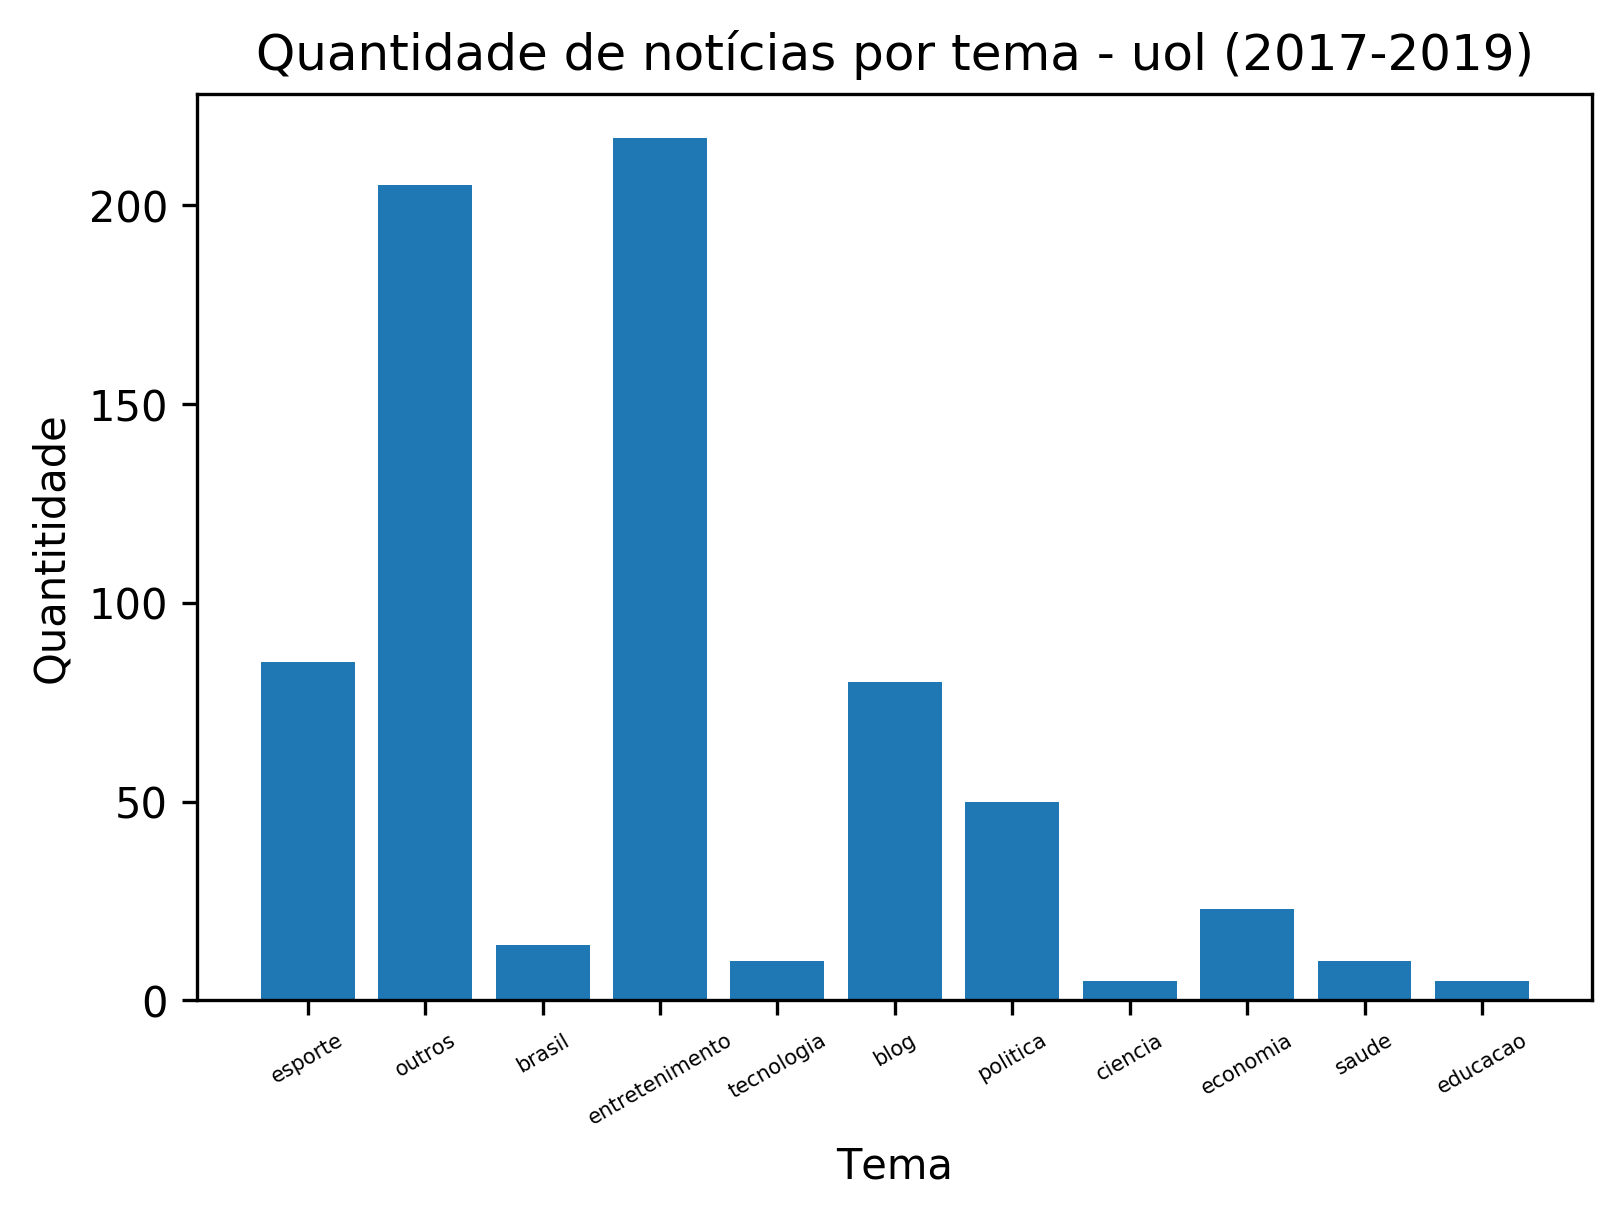

In [28]:
# Returns a tuple with:
# (mappedTheme, originalTheme)

def cleanUolThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if (\
        'sport' in themeString or\
        'espn' in themeString or\
        'andrerocha' in themeString or\
        'copadomundo' in themeString or\
        'placar' in themeString or\
        'marcelrizzo' in themeString or\
        'corneta' in themeString\
       ):
        return ('esporte', themeString)
    
    if ('blog' in themeString or\
        'liabock' in themeString or\
        'paulosampaio' in themeString
       ):
        return ('blog', themeString)
    
    if (\
        'jamilchade' in themeString or\
        'poder' in themeString or\
        'carlosmelo' in themeString or\
        'congressoemfoco' in themeString or\
        'josiasdesouza' in themeString or\
        'eleicoes' in themeString\
       ):
        return ('politica', themeString)
    
    if ('noticiasdatv' in themeString or\
        'glamurama' in themeString or\
        'estilo' in themeString or\
        'maxima' in themeString or\
        'chicobarney' in themeString or\
        'revistatrip' in themeString or\
        'chicobarney' in themeString or\
        'mensageirosideral' in themeString or\
        'humor' in themeString or\
        'tvfama' in themeString or\
        'comidasebebeidas' in themeString or\
        'paginacinco' in themeString or\
        'superpop' in themeString or\
        'memes' in themeString or\
        'turismo' in themeString or\
        'virgula' in themeString or\
        'carnaval' in themeString or\
        'tvefamosos' in themeString or\
        'f5' in themeString or\
        'ilustrada' in themeString or\
        'comidasebebidas' in themeString or\
        'cinema' in themeString or\
        'musica' in themeString or\
        'mauriciostycer' in themeString or\
        'caras' in themeString or\
        'cenapop' in themeString or\
        'amauryjr' in themeString or\
        'cenapop' in themeString or\
        'natelinha' in themeString or\
        'recreio' in themeString\
       ):
        return ('entretenimento', themeString)
    
    if ('gizmodo' in themeString or\
        'ciencia' in themeString):
        return ('tecnologia', themeString)
    
    if ('mundo' in themeString or\
        'jornalismo' in themeString or\
        'carros' in themeString or\
        'paranormal' in themeString or\
        'universa' in themeString or\
        'paranaportal' in themeString or\
        'aovivo' in themeString or\
        'uol' in themeString or\
        'piaui' in themeString or\
        'zip' in themeString or\
        'aventurasnahistoria' in themeString or\
        'viagem' in themeString or\
        'cotidiano' in themeString\
       ):
        return ('outros', themeString)
    
    if ('colunas' in themeString or\
        'opiniao' in themeString):
        return ('blog', themeString)
    
    if ('mercado' in themeString or\
        'todosabordo' in themeString):
        return ('economia', themeString)
    
    if ('vivabem' in themeString\
       ):
        return ('saude', themeString)
    
    return ('outros', themeString)
    possibleThemes = themeString.split("#")
    
    if (possibleThemes[0].startswith('www')):
        return (possibleThemes[1], themeString)
    
    return (possibleThemes[0], themeString)

def createUolConversionTable():
    uolConversionTable = {}

    data = map(\
        lambda x: cleanUolThemes(x),\
        list(uolThemes.keys())\
    )

    for theme, originalTheme in data:
        uolConversionTable[originalTheme] = theme
        
    return uolConversionTable

uolConversionTable = createUolConversionTable()

uolThemesConverted = []
for theme in uolThemes:
    theme = str(theme)
    uolThemesConverted.append(uolConversionTable[theme])
    

uolThemesConverted = Counter(uolThemesConverted)

index = np.arange(len(uolThemesConverted.keys()))
# i = plt.bar(allThemes.keys(), allThemes.values())
plt.bar(index, uolThemesConverted.values())
plt.xlabel('Tema', fontsize=10)
plt.ylabel('Quantitidade', fontsize=10)
plt.xticks(index, uolThemesConverted.keys(), fontsize=5, rotation=30)
plt.title('Quantidade de notícias por tema - uol (2017-2019)')
plt.savefig('uol.png')

# UOL - Tempo

"\nfrom scipy.interpolate import interp1d\n\n\nlist_x = np.array(range(0, 798))\nlist_y = np.array(data_perc['politica'])\n\nlist_x = np.array_split(list_x, 5)[0]\nlist_y = np.array_split(list_y, 5)[0]\n\nx_new = np.linspace(list_x.min(), list_x.max(),500)\nf = interp1d(list_x, list_y, kind='quadratic')\ny_smooth=f(x_new)\n\nplt.rcParams['figure.dpi']= 500\n\nplt.plot (x_new,y_smooth)\nplt.scatter(list_x, list_y)\n\nplt.savefig('doid.png')\n"

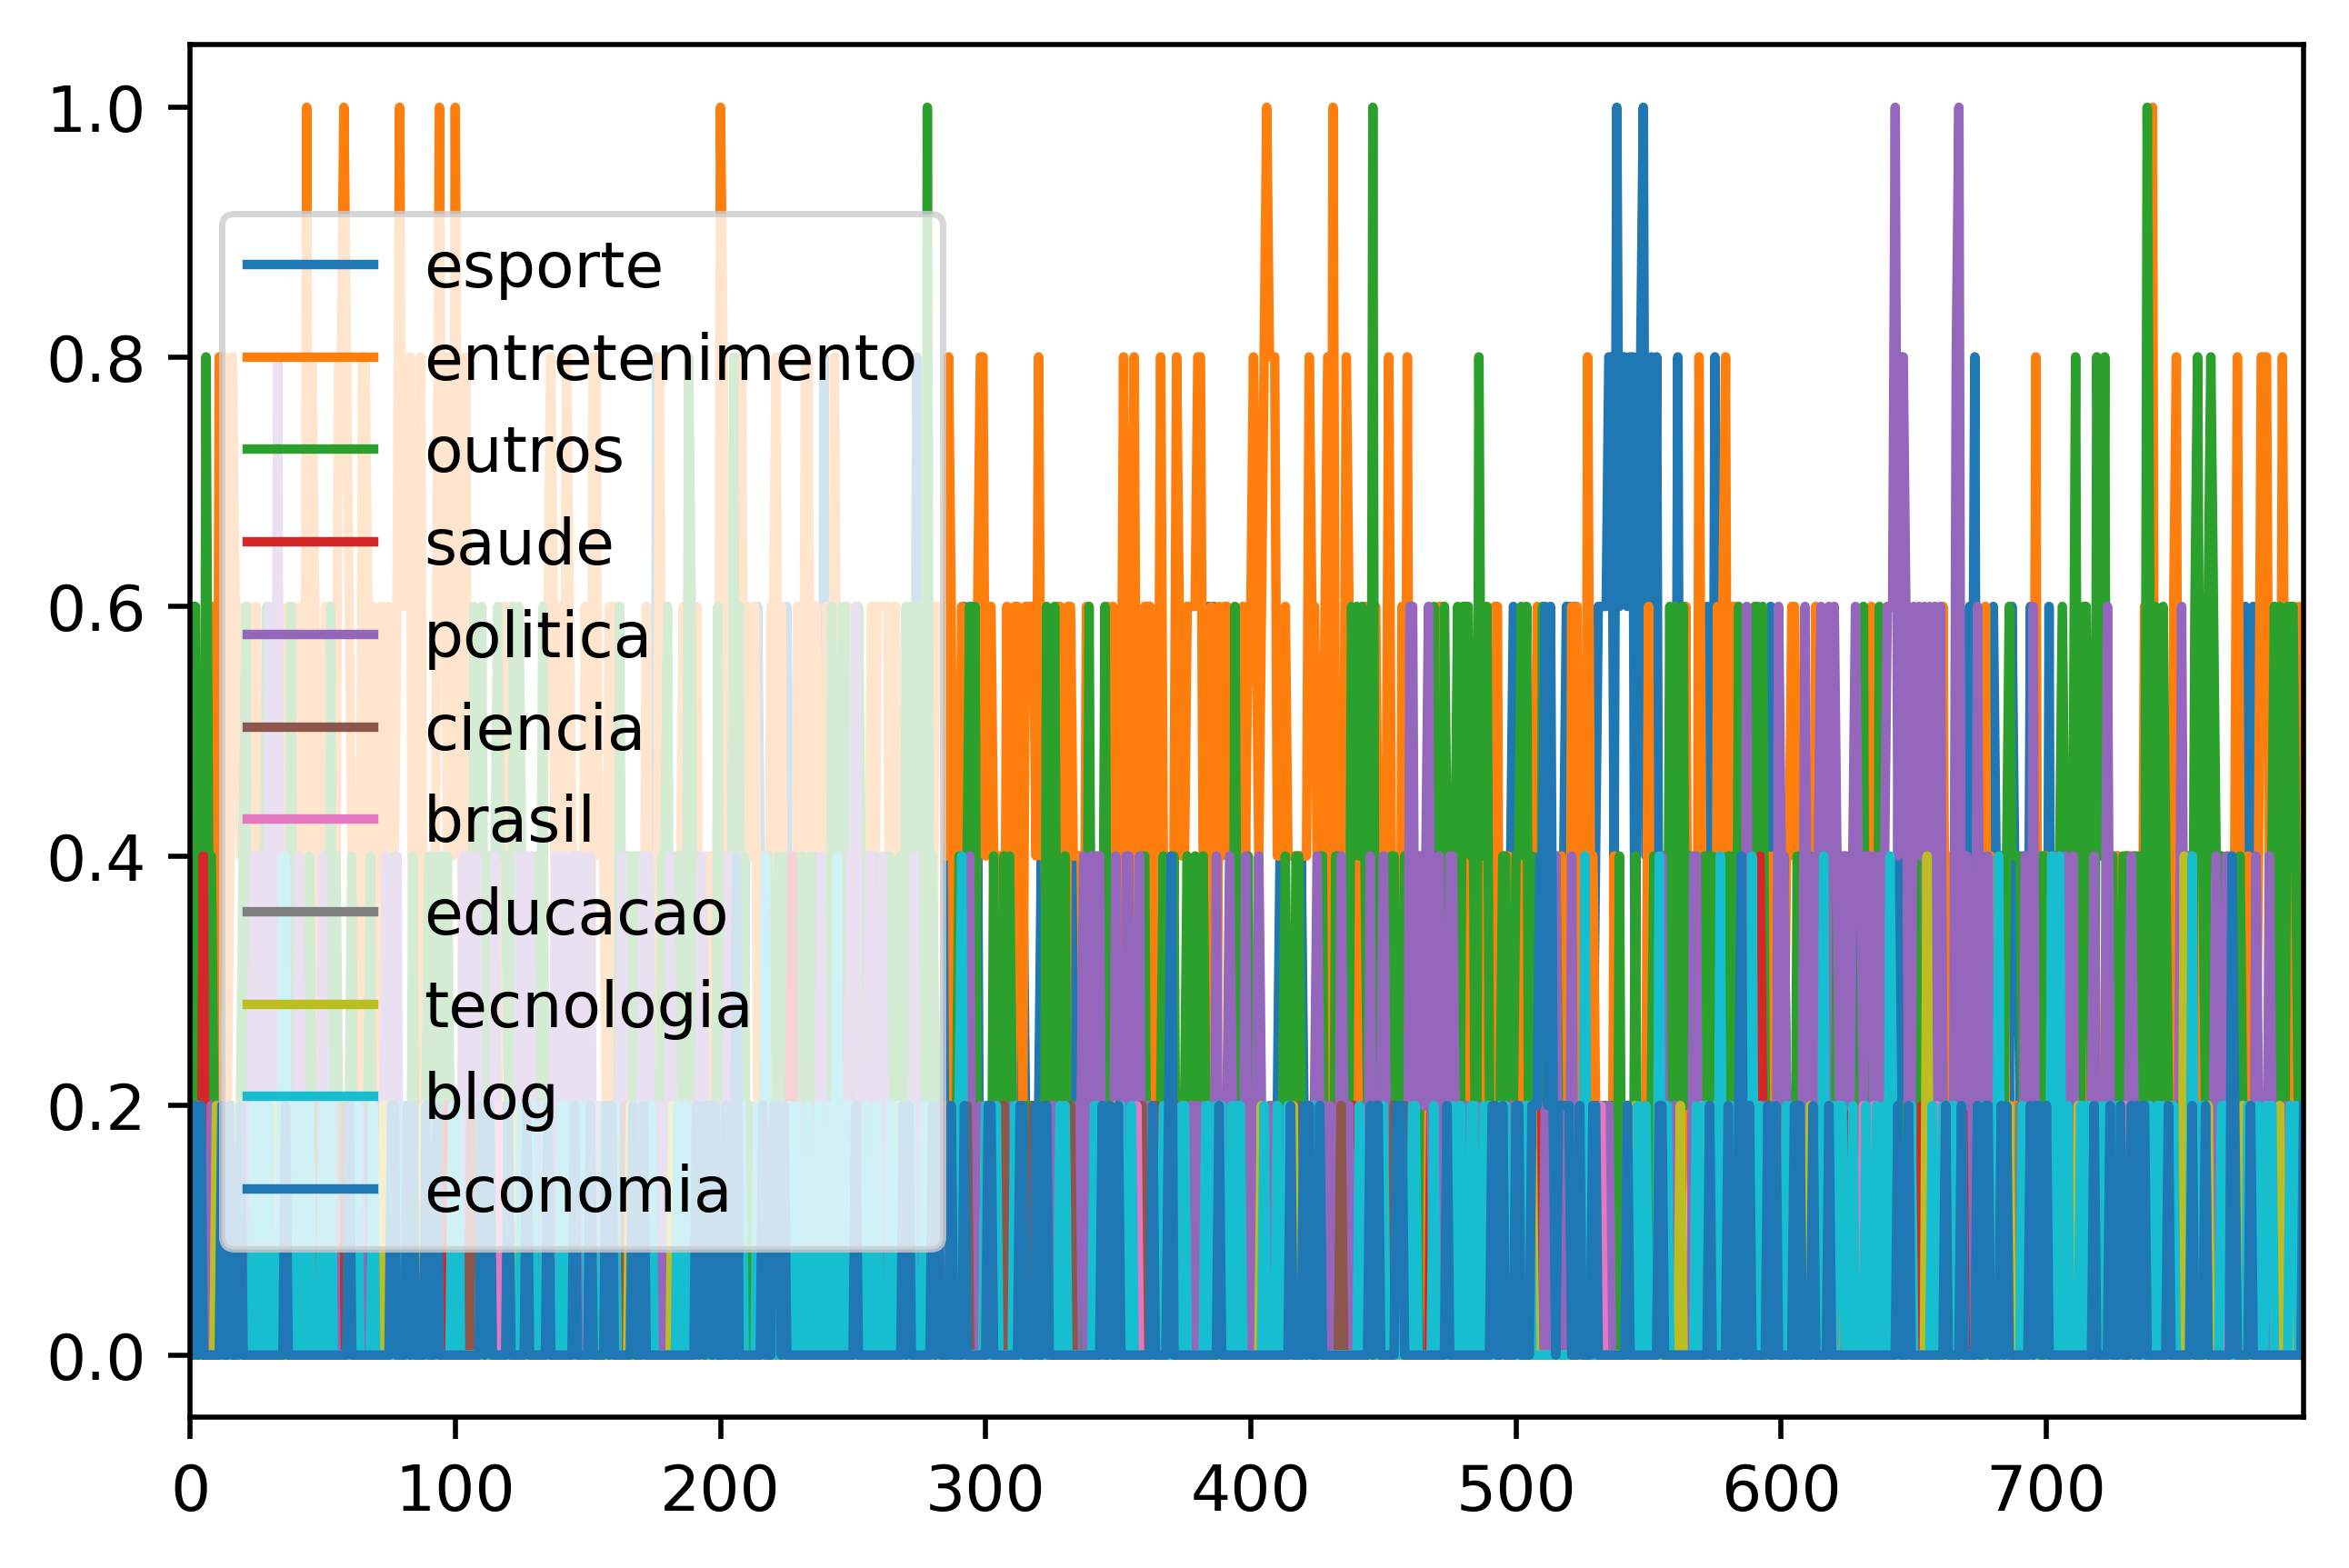

In [53]:
endTable = {}
for index, row in uol.iterrows():
    themesOfDay = []
    for key in row.keys():
        if 'Tema' in key:
            themesOfDay.append(cleanUolThemes(row[key])[0])
            
    themesOfDay = dict(Counter(themesOfDay))
    for theme in baseThemes:
        if (theme not in themesOfDay.keys()):
            themesOfDay[theme] = 0
    
    for key, value in themesOfDay.items():
        if (key not in endTable.keys()):
            endTable[key] = []
            
        endTable[key].append(value)

data = pd.DataFrame(endTable)
data_perc = data.divide(data.sum(axis=1), axis=0)

data_perc.plot()

'''
from scipy.interpolate import interp1d


list_x = np.array(range(0, 798))
list_y = np.array(data_perc['politica'])

list_x = np.array_split(list_x, 5)[0]
list_y = np.array_split(list_y, 5)[0]

x_new = np.linspace(list_x.min(), list_x.max(),500)
f = interp1d(list_x, list_y, kind='quadratic')
y_smooth=f(x_new)

plt.rcParams['figure.dpi']= 500

plt.plot (x_new,y_smooth)
plt.scatter(list_x, list_y)

plt.savefig('doid.png')
'''

# data_perc.plot(stacked=True, plot='bar')
# data_perc.interpolate(method='time').plot(y='politica', kind='line', figsize=(10, 10))


# Estadao 

In [4]:
# NaN significa que não existe a notícia em dado dia

def cleanupEstadaoThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    if ('emais' in themeString):
        return ('entretenimento', themeString)
    return ('outros', themeString)


estadaoThemesCounter = Counter()
for theme, qty in dict(estadaoThemes).items():
    if (str(theme) != 'nan'):
        estadaoThemesCounter[cleanupEstadaoThemes(theme)[0]] += qty
        #print(cleanupEstadaoThemes(theme), qty)
        

def table():
    index = np.arange(len(estadaoThemesCounter.keys()))
    # i = plt.bar(allThemes.keys(), allThemes.values())
    plt.bar(index, estadaoThemesCounter.values())
    plt.xlabel('Tema', fontsize=10)
    plt.ylabel('Quantitidade', fontsize=10)
    plt.xticks(index, estadaoThemesCounter.keys(), fontsize=5, rotation=30)
    plt.title('Quantidade de notícias por tema - estadao (2017-2019)')
    plt.savefig('estadao.png')
    

NameError: name 'Counter' is not defined

# Folha

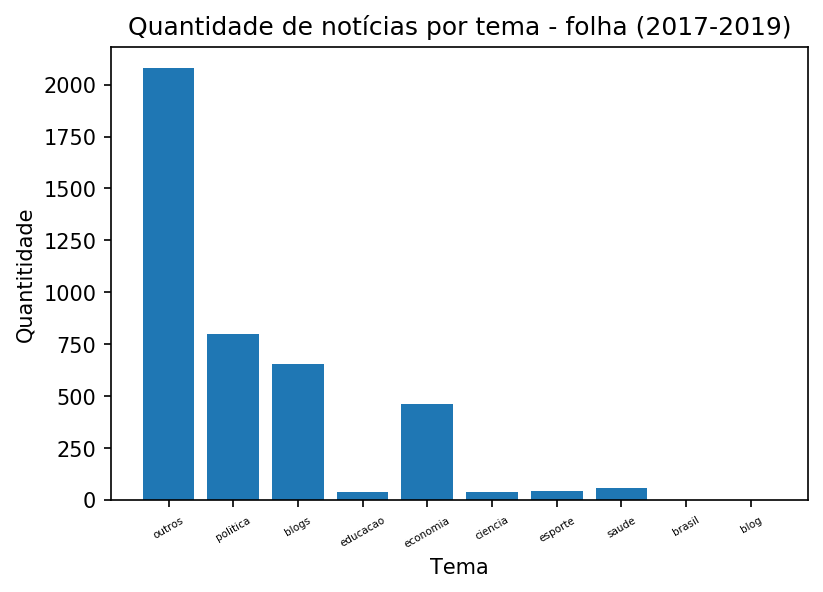

In [156]:
# NaN significa que não existe a notícia em dado dia

def cleanupFolhaThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if ('poder' in themeString):
        return ('politica', themeString)
    
    if ('mercado' in themeString):
        return ('economia', themeString)
    
    if ('colunas' in themeString or\
        'colunista' in themeString or\
        'opiniao' in themeString
       ):
        return ('blogs', themeString)
    
    return ('outros', themeString)

folhaThemesCounter = Counter()

for theme, qty in dict(folhaThemes).items():
    if (theme != 'nan'):
        folhaThemesCounter[cleanupFolhaThemes(theme)[0]] += qty
        
def folhaTable():
    index = np.arange(len(folhaThemesCounter.keys()))
    # i = plt.bar(allThemes.keys(), allThemes.values())
    plt.bar(index, folhaThemesCounter.values())
    plt.xlabel('Tema', fontsize=10)
    plt.ylabel('Quantitidade', fontsize=10)
    plt.xticks(index, folhaThemesCounter.keys(), fontsize=5, rotation=30)
    plt.title('Quantidade de notícias por tema - folha (2017-2019)')
    plt.savefig('folha.png')

folhaTable()

# Scratchpad

In [10]:
allThemes = list(vejaThemes.keys()) + list(estadaoThemes.keys()) + list(folhaThemes.keys()) + list(uolThemes.keys())
wantedKeys = ['esporte', 'brasil', 'entretenimento', 'mundo', 'economia', 'politica', 'saude', 'ciencia', 'tecnologia', 'blog', 'placar', 'educacao', 'tveja', 'revista-veja', 'blogs', 'especiais', 'ideias', 'gastronomia']
unwantedKeys = set(allThemes.keys()) - set(wantedKeys)
themesFiltered = { 'outros': 0 }

for key in wantedKeys:
    themesFiltered[key] = allThemes[key]

for key in unwantedKeys:
    themesFiltered['outros'] += allThemes[key]

themesFiltered

AttributeError: 'list' object has no attribute 'keys'

In [5]:

index = np.arange(len(themesFiltered.keys()))
# i = plt.bar(allThemes.keys(), allThemes.values())
plt.bar(index, themesFiltered.values())
plt.xlabel('Tema', fontsize=10)
plt.ylabel('Quantitidade', fontsize=10)
plt.xticks(index, themesFiltered.keys(), fontsize=5, rotation=30)
plt.title('Quantidade de notícias por tema - Veja (2017-2019)')
plt.savefig('veja.png')

NameError: name 'themesFiltered' is not defined

In [ ]:
allThemes.keys()

In [ ]:
def getQuantityOfThemes(themes, themesConversionTable):
    
    for key, value in themes:
        key